Spatio-temporal dynamics of functional connectivity
--

Step 1 -- compute FC matrices in sliding windows 

In [38]:
import numpy as np 
from matplotlib import pyplot as plt 
from nilearn.plotting import plot_matrix, plot_connectome
from dfc import dfc_slid_window
%matplotlib inline

Scan the directory and read time series 

In [2]:
import os 
datapath = '/Users/nicolasfarrugia/Documents/recherche/data_mpilmbb/10subjects'
fileslist = os.listdir(datapath) 

In [6]:
allts = []

for curfile in fileslist[:3]:
    allts.append(np.load(os.path.join(datapath,curfile))['ts'])

In [7]:
allts = np.stack(allts)

In [8]:
allts.shape

(3, 652, 93)

In [15]:
dfc_slid_window?

Calculate sliding windows 

In [16]:
all_sl,_ = dfc_slid_window(allts)

In [17]:
all_sl.shape

(3, 622, 30, 93)

this corresponds to (subjects, time, window size,regions )

Computing FC matrices for all windows

In [32]:
from nilearn.connectome import ConnectivityMeasure
estimator = ConnectivityMeasure(kind='covariance',vectorize=False,discard_diagonal=True)

In [35]:
all_FC_sl = []

for sl in all_sl:
    all_FC_sl.append(estimator.fit_transform(sl))
    
    
all_FC_sl = np.stack(all_FC_sl)

In [36]:
all_FC_sl.shape

(3, 622, 93, 93)

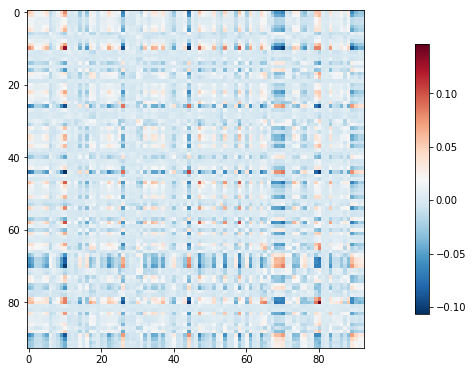

In [39]:
plot_matrix(all_FC_sl[0,13])